# CPSC 483 Project 1

##### Question 1

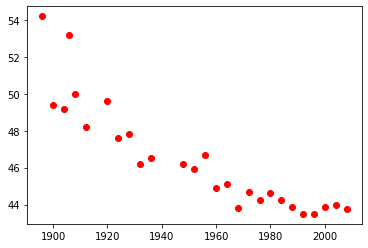

In [1]:
import numpy as np
data = np.genfromtxt('male400.csv', delimiter=',', skip_header=1)
x = data[:,0][:,None]
t = data[:,1][:,None]

import pylab as plt
%matplotlib inline
plt.plot(x,t,'ro')

Yes, the relationship appears to be linear.

##### Question 2

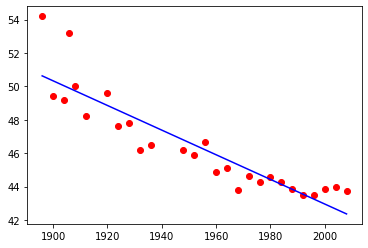

In [2]:
maxorder = 1
X = np.ones_like(x)
for i in range(1,maxorder+1):
    X = np.hstack((X,x**i))
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
f_test = np.dot(X,w)
plt.plot(x,t,'ro')
plt.plot(x,f_test,'b')

In [3]:
squared_diff = list()
for j in range(0, x.size):
    diff = t[j] - f_test[j]
    squared_diff.append(diff**2)
MSE = sum(squared_diff)/x.size
print(MSE)

[1.57803317]


MSE = 1.57803317

##### Question 3

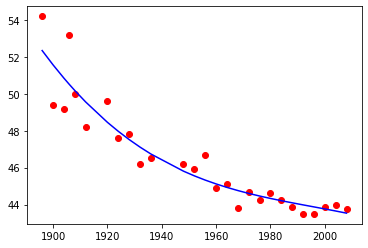

In [4]:
#3rd order polynomial
maxorder = 3
X = np.ones_like(x)
for k in range(1,maxorder+1):
    X = np.hstack((X,x**k))
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
f_test3 = np.dot(X,w)
plt.plot(x,t,'ro')
plt.plot(x,f_test3,'b')

In [5]:
squared_diff3 = list()
for l in range(0,x.size):
    diff = t[l] - f_test3[l]
    squared_diff3.append(diff**2)
MSE3 = sum(squared_diff3)/x.size
print(MSE3)

[0.9738944]


MSE for 3rd order polynomial is 0.9738944 which is less than the linear model.

##### Question 4

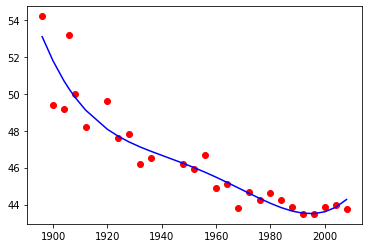

In [6]:
#5th order polynomial
maxorder = 5
X = np.ones_like(x)
for m in range(1,maxorder+1):
    X = np.hstack((X,x**m))
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
f_test5 = np.dot(X,w)
plt.plot(x,t,'ro')
plt.plot(x,f_test5,'b')

In [7]:
squared_diff5 = list()
for n in range(0,x.size):
    diff = t[n] - f_test5[n]
    squared_diff5.append(diff**2)
MSE5 = sum(squared_diff5)/x.size
print(MSE5)

[0.95101141]


MSE of linear: 1.57803317<br/>
MSE of 3rd order: 0.9738944<br/>
MSE of 5th order: 0.95101141<br/>

##### Question 5

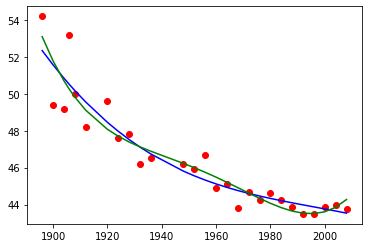

In [8]:
plt.plot(x,t,'ro')
plt.plot(x,f_test3,'b')
plt.plot(x,f_test5,'g')

5th order polynomial looks like the better model.

##### Question 6

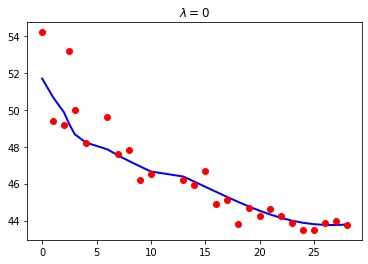

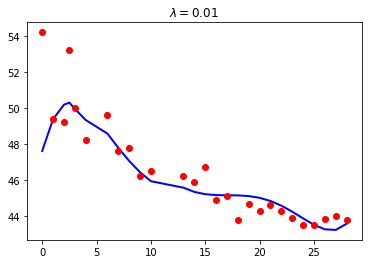

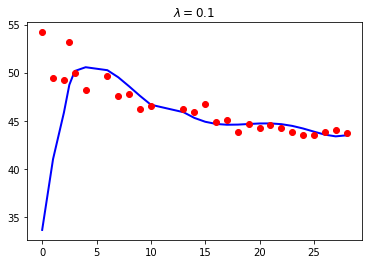

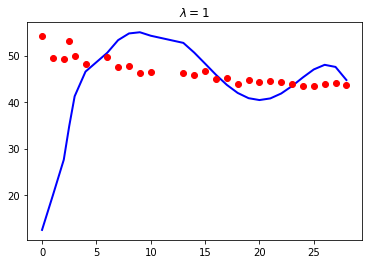

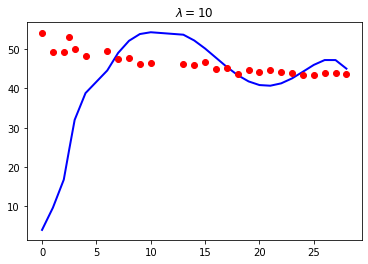

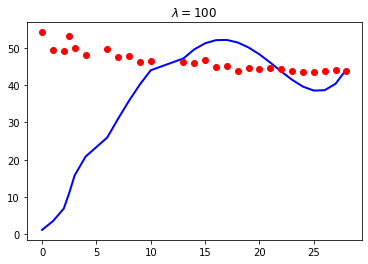

In [9]:
#Creating X
maxorder = 5
x = (x-1896)/4
x_test = np.linspace(1,27,27)[:,None]
X = np.ones_like(x)
X_test = np.ones_like(x_test)
for q in range(1,maxorder+1):
    X = np.hstack((X,x**q))
    X_test = np.hstack((X_test, x_test**q))

#Loop over different values of lambda
for lamb in [0,0.01,0.1,1,10,100]:
    w = np.linalg.solve(np.dot(X.T,X) + x.size*lamb*np.identity(maxorder+1),np.dot(X.T,t))
    f_test = np.dot(X_test,w)
    plt.figure()
    plt.plot(x,f_test,'b-',linewidth=2)
    plt.plot(x,t,'ro')
    title = '$\lambda=$%g'%lamb
    plt.title(title)

When lambda = 0, it seems to fit the data the best.